# Scale Free

Corresponding to Cahpter 4 in the book [Network Science Book](https://www.networksciencebook.com/) by Albert-László Barabási



In [1]:
!pip install numpy pandas matplotlib networkx scipy powerlaw

Defaulting to user installation because normal site-packages is not writeable


## load readl networks

In [2]:
# load real graphs
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
graph_list=[]
name_list=[]
# downloaded from https://www.wormwiring.org/
df = pd.read_excel('./Data/celegans_connectome.xlsx')
chemical_synapses = df[df['Type'] == 'S']
G_celegans = nx.from_pandas_edgelist(chemical_synapses, source='Neuron 1', target='Neuron 2', create_using=nx.DiGraph())
graph_list.append(G_celegans)
name_list.append("C. elegans connectome")

df = pd.read_csv('./Data/drosophila_brain_connectome.csv')
G_drosophila_brain = nx.from_pandas_edgelist(df, source='pre_root_id', target='post_root_id', create_using=nx.DiGraph())
graph_list.append(G_drosophila_brain)
name_list.append("Drosophila brain connectome")

df = pd.read_csv('./Data/drosophila_VNC_connectome.csv')
G_drosophila_VNC = nx.from_pandas_edgelist(df, source='bodyId_pre', target='bodyId_post', create_using=nx.DiGraph())
graph_list.append(G_drosophila_VNC)
name_list.append("Drosophila VNC connectome")

G_collab = nx.read_gml("./Data/cond-mat-2005/cond-mat-2005.gml", label="id")
graph_list.append(G_collab)
name_list.append("Collaboration network")

G_social =  nx.read_edgelist("./Data/facebook_combined.txt", nodetype=int)
graph_list.append(G_social)
name_list.append("Facebook Social network")


G_www =  nx.read_edgelist("./Data/web-BerkStan.txt", nodetype=int)
graph_list.append(G_www)
name_list.append("Web Graph BerkStan 2002")




## Power laws in the distribution of degree

In [19]:
import numpy as np
import networkx as nx
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import linregress
import powerlaw

def manual_mle_gamma(degrees, xmin):
    """
    Manual MLE estimation for discrete power-law: p(k) ~ k^(-gamma)
    """
    data = np.array([k for k in degrees if k >= xmin])
    n = len(data)
    if n == 0:
        raise ValueError("No data points above xmin.")
    gamma = 1 + n / np.sum(np.log(data / (xmin - 0.5)))
    return gamma
def compare_powerlaw_fit_vs_manual(G, plot=False, graphtitle=None):
    """
    Compare gamma from powerlaw.Fit vs. manual log-log and manual MLE.
    """
    degrees = [d for _, d in G.degree()]

    # Fit with powerlaw (uses MLE)
    fit = powerlaw.Fit(degrees, discrete=True)
    gamma_plfit = fit.power_law.alpha
    xmin = fit.power_law.xmin

    # Manual MLE (same formula)
    gamma_mle_manual = manual_mle_gamma(degrees, xmin)

    # Manual log-log regression (still included for comparison)
    degree_counts = np.bincount([d for d in degrees if d >= xmin])
    k_vals = np.nonzero(degree_counts)[0]
    p_k = degree_counts[k_vals] / sum(degree_counts)

    mask = (p_k > 0)
    k_vals = k_vals[mask]
    p_k = p_k[mask]
    log_k = np.log(k_vals)
    log_pk = np.log(p_k)

    slope, intercept, *_ = linregress(log_k, log_pk)
    gamma_loglog = -slope

    if plot:
        plt.figure()
        plt.loglog(k_vals, p_k, 'bo', label='Empirical')
        plt.loglog(k_vals, np.exp(intercept) * k_vals**slope, 'r--',
                   label=f'Log-log fit γ={gamma_loglog:.2f}')
        fit.power_law.plot_pdf(color='g', linestyle='-.', label=f'Powerlaw.Fit γ={gamma_plfit:.2f}')
        plt.axvline(xmin, color='gray', linestyle=':', label=f'$k_{{\\min}}$ = {xmin}')
        plt.xlabel("Degree k")
        plt.ylabel("p(k)")
        plt.legend()
        if graphtitle is not None:
            plt.title(f"{graphtitle} - Powerlaw Fit vs Manual Estimation")
        else:
            plt.title("Powerlaw.Fit vs Manual Estimation")
      
        plt.show()
    # xmin  is the minimum value above which the data is assumed to follow a power-law distribution
    return {
        "powerlaw_fit_gamma": gamma_plfit,
        "manual_mle_gamma": gamma_mle_manual,
        "manual_loglog_gamma": gamma_loglog,
        "xmin": xmin
    }


Calculating best minimal value for power law fit


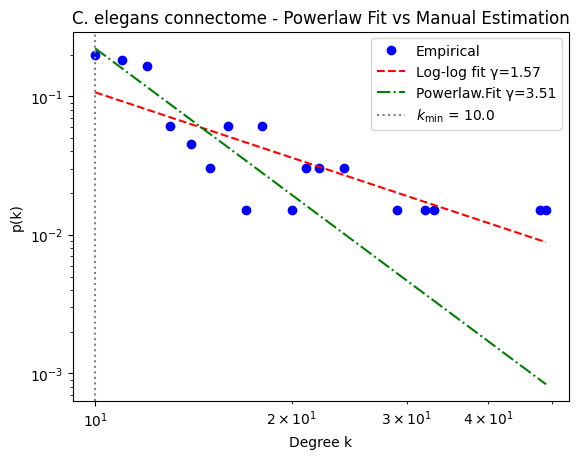

Calculating best minimal value for power law fit


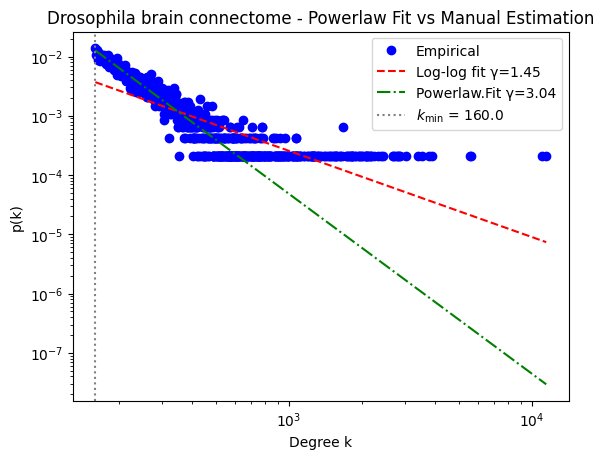

Calculating best minimal value for power law fit


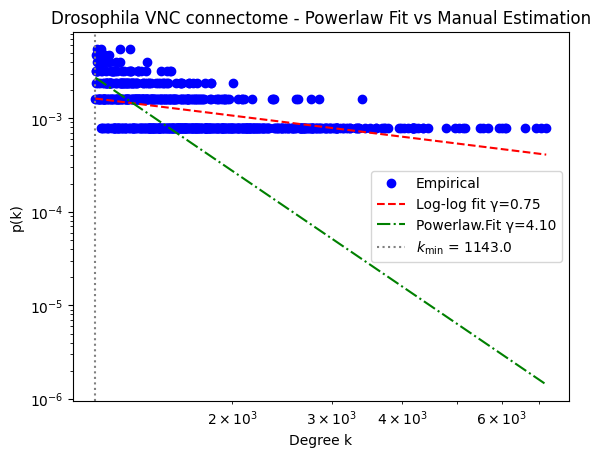

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


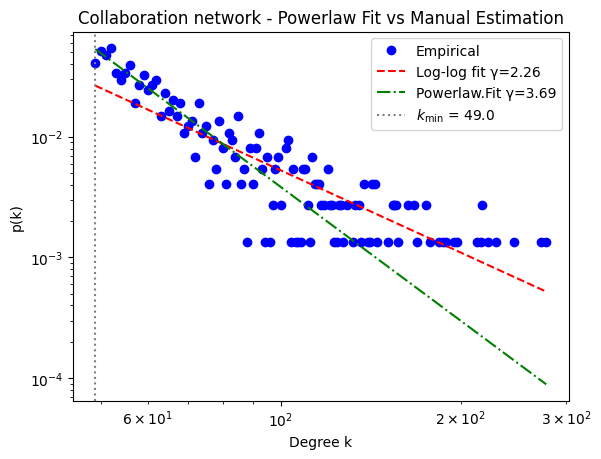

Calculating best minimal value for power law fit


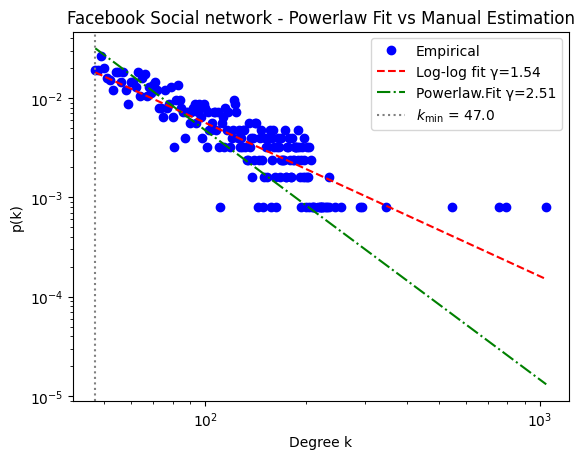

Calculating best minimal value for power law fit


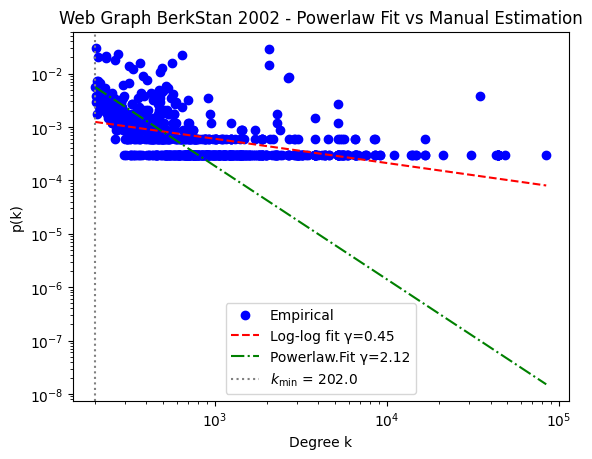

In [20]:

for name,G in zip(name_list, graph_list):
    gamma_struct = compare_powerlaw_fit_vs_manual(G, plot=True,graphtitle=name)
    # gamma_powerlaw_fit=gamma_struct["powerlaw_fit_gamma"]
    # gamma_manual_mle=gamma_struct["manual_mle_gamma"]
    # gamma_manual_loglog=gamma_struct["manual_loglog_gamma"]

    # print(f"graph= {name}: powerlaw_fit_gamma={gamma_powerlaw_fit:.2f}, manual_mle_gamma={gamma_manual_mle:.2f}, manual_loglog_gamma={gamma_manual_loglog:.2f}")

side note: fitting in log log scale and fitting in regular scale give big differences in power coefficient!!!